In [3]:
import random

import matplotlib.pyplot as plt
import jax
from jax import numpy as np
from jax import scipy as sp

In [4]:
def seed():
    return jax.random.PRNGKey(random.randint(0, 228))

In [28]:
eps = 10**-5
data = {10: [], 100: [], 1000: []}
for n in [10, 100, 1000]:
    for _ in range(100):
        x = np.ones(n)
        diag = []
        kappa = jax.random.uniform(seed()) * 4 + 1
        posmax = random.randint(0, n - 1)
        while True:
            posmin = random.randint(0, n)
            if posmin != posmax:
                break
        for i in range(n):
            if i == posmax:
                diag += [kappa]
                continue
            if i == posmin:
                diag += [1.]
                continue
            diag += [jax.random.uniform(seed()) * (kappa - 1) + 1]
        A = np.diag(np.array(diag))
        def f(x):
            return x.T @ A @ x
        alpha = 2 / (1. + kappa)
        norm = np.linalg.norm(jax.grad(f)(x), ord=2)
        iters = 0
        while np.linalg.norm(jax.grad(f)(x), ord=2)**2 <= eps * norm**2:
            x = x - alpha * jax.grad(f)(x)
            iters += 1
        data[n] += [(kappa, iters)]

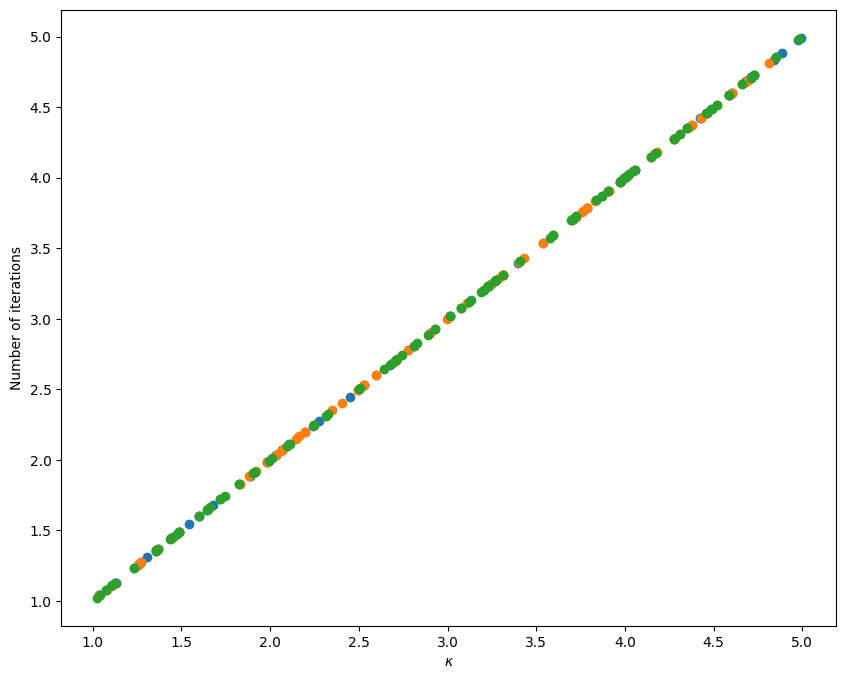

In [32]:
plt.figure(figsize=(10, 8))
plt.xlabel('$\kappa$')
plt.ylabel('Number of iterations')
for n, l in data.items():
    if n == 10:
        color = 'r'
    elif n == 100:
        color = 'b'
    else:
        color = 'g'
    plt.scatter(np.array(l)[:, 0], np.array(l)[:, 0])